# Risk Parity
-  กลยุทธ์ในการจัดพอร์ตการลงทุนที่มีเป้าหมายให้มีการกระจายความเสี่ยงอย่างเท่าเทียมกันในแต่ละสินทรัพย์ โดยแทนที่จะให้น้ำหนักสินทรัพย์ตามมูลค่า (เช่นในพอร์ตแบบดั้งเดิมที่ให้น้ำหนักสินทรัพย์ตามขนาดมูลค่าหรือการเติบโตของตลาด) Risk Parity มุ่งเน้นไปที่การกระจายความเสี่ยงตาม ความผันผวน ของแต่ละสินทรัพย์เพื่อให้ความเสี่ยงในพอร์ตสมดุลกัน

In [1]:
import sys
import os
# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import fnType
sx.enable_autoreload()
print(sx.__version__)

Autoreload enabled.
0.00103


In [2]:
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

%config InlineBackend.figure_format='retina'

In [5]:
def display_image(img):
    display(HTML(f'<div style="text-align: left;"><img src="../_static/{img}.png" style="height:100px;"></div>'))

In [7]:
# ตัวอย่างการจำลอง ข้อมูล
S0 = 50  # ราคาหุ้นเริ่มต้น
mu = 0.02 # ค่า drift (0% ต่อปี)
sigma = 0.04  # ความผันผวน (4% ต่อปี)
T = 3 # จำลอง 3 ปี (252 วันทำการ)
dt = 1/252  # เวลาย่อย 1 วัน
N = int(T / dt)  # จำนวนก้าว

# เรียกใช้ฟังก์ชัน
stock_prices1, time_steps = sx.generate_gbm_price(S0+30, mu*1.1, sigma, T, dt, N)
stock_prices2, time_steps = sx.generate_gbm_price(S0*.1, mu, sigma*1.2, T, dt, N)
stock_prices3, time_steps = sx.generate_gbm_price(S0+100, mu*1.1, sigma, T, dt, N)
stock_prices4, time_steps = sx.generate_gbm_price(S0*0.5, mu, sigma, T, dt, N)

basket = ['asset1','asset2','asset3','asset4']

dates = pd.date_range(start="2020-01-01", periods=N)
# สร้าง DataFrame เพื่อแสดงข้อมูล
df1 = pd.DataFrame({'Date': dates,'close': stock_prices1})
df2 = pd.DataFrame({'Date': dates,'close': stock_prices2})
df3 = pd.DataFrame({'Date': dates,'close': stock_prices3})
df4 = pd.DataFrame({'Date': dates,'close': stock_prices4})

df = pd.concat([df1['close'],df2['close'],df3['close'],df4['close']],axis=1)
df.columns = basket
df['Date'] = dates
df = df.set_index('Date')

df.tail(5)

asset1    asset2      asset3     asset4
Date                                                  
2022-01-21  86.363264  4.842586  152.390193  25.295482
2022-01-22  86.791308  4.836558  153.117089  25.290503
2022-01-23  87.098154  4.837325  153.437216  25.337668
2022-01-24  86.950372  4.830062  153.753551  25.376787
2022-01-25  86.749309  4.817143  153.641947  25.400260

In [9]:
dataReader = sx.HistStockPrice()

*you are using nologin method, data you access may be limited


In [143]:
# real world
asset1 = 'spali'
asset2 = 'intuch'
asset3 = 'aura'
asset4 = 'rbf' #dusit #rbf

basket = [asset1,asset2,asset3,asset4]

start_date = '2024-01-01'
stop_date = '2024-09-27'

df1 = dataReader.getPrice(symbol=asset1,start=start_date,stop=stop_date) 
df2 = dataReader.getPrice(symbol=asset2,start=start_date,stop=stop_date) 
df3 = dataReader.getPrice(symbol=asset3,start=start_date,stop=stop_date) 
df4 = dataReader.getPrice(symbol=asset4,start=start_date,stop=stop_date) 

df = pd.concat([df1['close'],df2['close'],df3['close'],df4['close']],axis=1)
df.columns = [asset1,asset2,asset3,asset4]
df.tail(3)

spali  intuch  aura   rbf
Date                                 
2024-09-25   20.8   92.25  15.5  6.40
2024-09-26   20.5   92.50  15.5  6.75
2024-09-27   20.6   92.75  16.1  6.50

<Axes: xlabel='Date'>

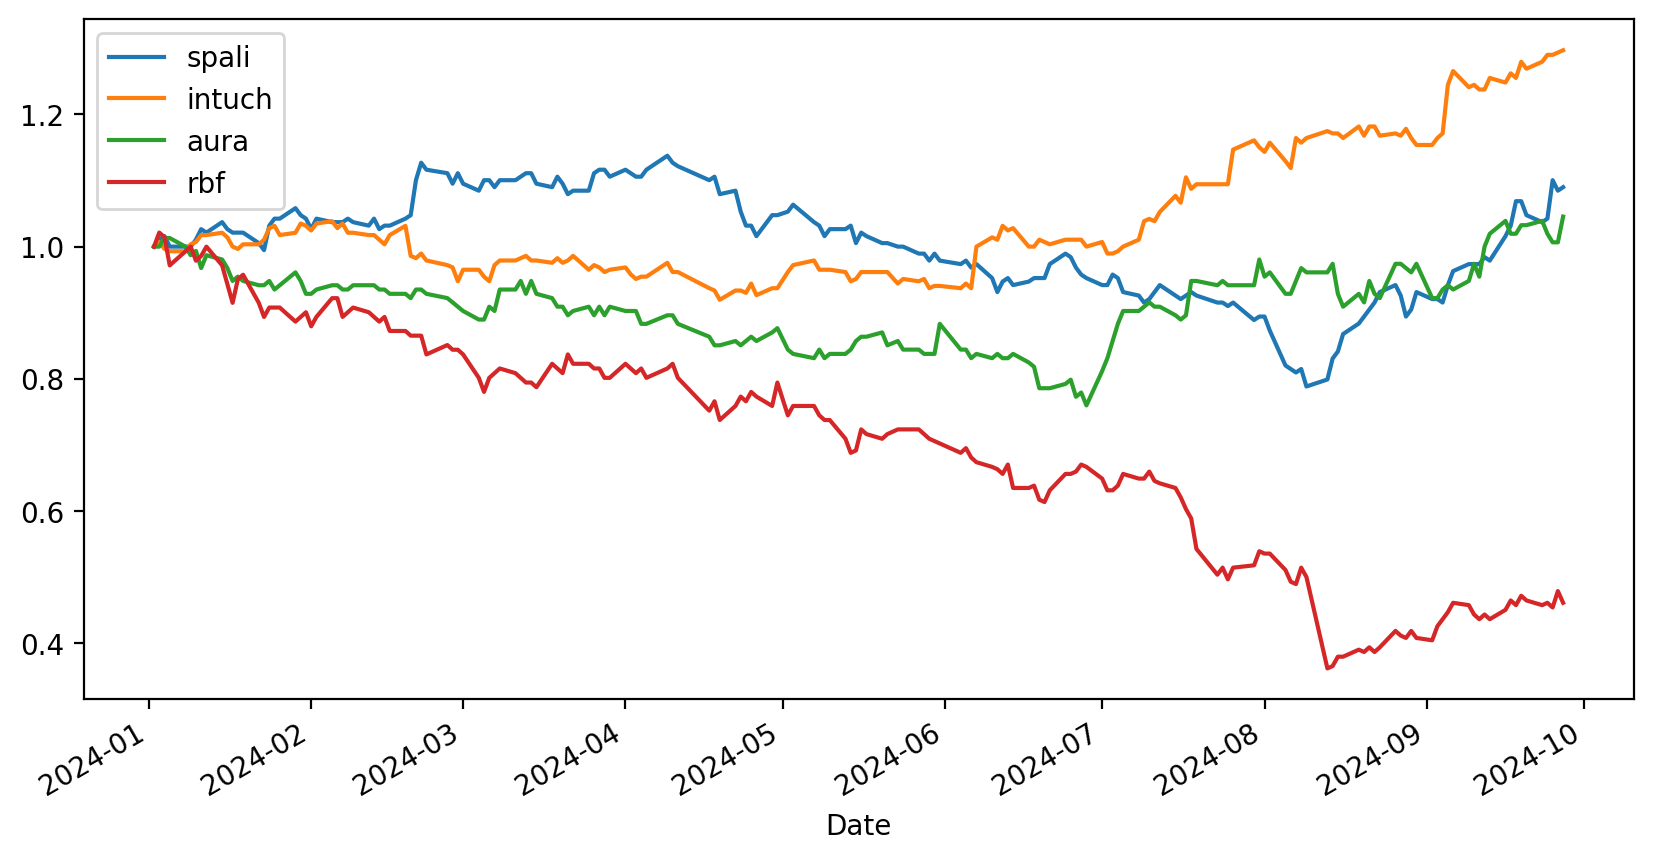

In [145]:
#df = df.tail(100)#.plot(figsize=(6,3))
df = df/df.iloc[0] #rebase 100
df.plot(figsize=(10,5))

In [146]:
df.head(3)

spali    intuch      aura       rbf
Date                                              
2024-01-02  1.000000  1.000000  1.000000  1.000000
2024-01-03  1.010582  1.006993  1.000000  1.021277
2024-01-04  1.015873  0.996503  1.012987  1.014184

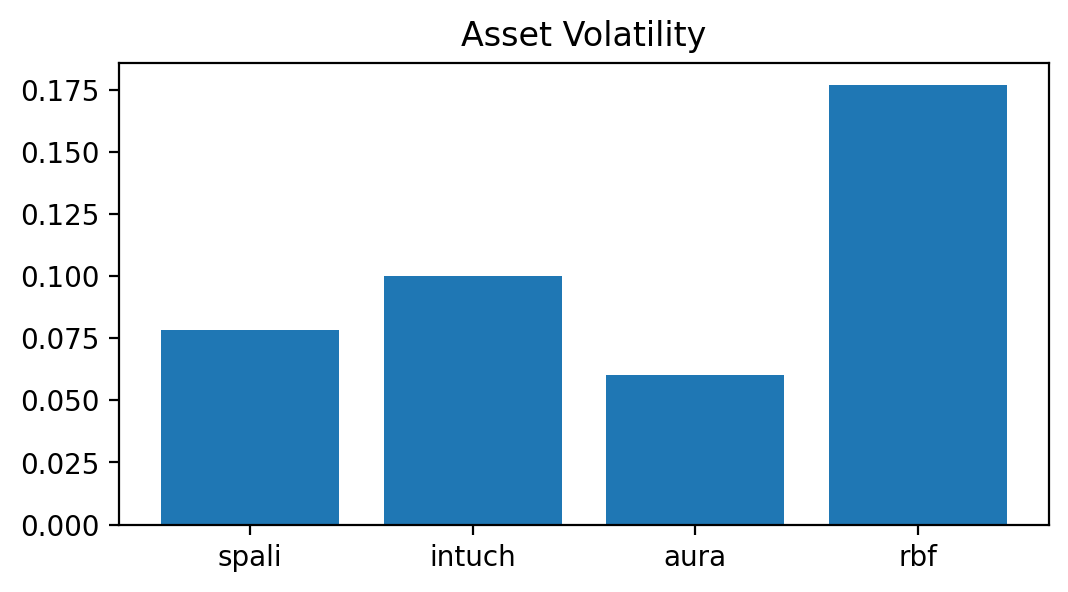

In [148]:
plt.subplots(figsize=(6,3))
plt.bar(x=df.std().index,height=df.std())
plt.title('Asset Volatility')
plt.show()

## Risk Contribution

<b>Risk Contribution</b> คือการวัดว่าความเสี่ยงของสินทรัพย์แต่ละตัวมีส่วนในการสร้าง ความเสี่ยงรวมของพอร์ต มากน้อยเพียงใด 

<b>Marginal Risk Contribution (MRC)</b> คือการวัดว่าหากเพิ่มน้ำหนักการลงทุนของสินทรัพย์นั้นขึ้นเพียงเล็กน้อย (เช่น เพิ่มน้ำหนักขึ้น 1 หน่วย) จะทำให้ความเสี่ยงรวมของพอร์ตเพิ่มขึ้นหรือลดลงเท่าใด

In [153]:
# Function to calculate portfolio risk
def portfolio_risk(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Function to calculate risk contribution of each asset
def risk_contribution(weights, cov_matrix):
    port_risk = portfolio_risk(weights, cov_matrix)
    marginal_contrib = np.dot(cov_matrix, weights)
    return weights * marginal_contrib / port_risk

# Function to calculate percentage risk contribution
def percentage_risk_contribution(weights, cov_matrix):
    total_risk = portfolio_risk(weights, cov_matrix)
    marginal_contrib = np.dot(cov_matrix, weights)
    risk_contributions = weights * marginal_contrib / total_risk
    return 100 * risk_contributions / total_risk  # Convert to percentage

In [155]:
n_assets = 4
weights = np.ones(n_assets) / n_assets
initial_weights = weights

# Bounds for weights: between 0 and 1
bounds = tuple((0, 1) for asset in range(n_assets))

# Constraints: sum of weights must be 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

cov_matrix = df.cov()

pct_rcVbefore = percentage_risk_contribution(weights,cov_matrix)

# สร้าง DataFrame แสดงผล
rc_df = pd.DataFrame({
    'Asset': basket,
    'Weight': weights,
    'Risk Contribution(%)': pct_rcVbefore
})

# แสดงผล Risk Contribution
rc_df

Asset  Weight  Risk Contribution(%)
0   spali    0.25             28.262657
1  intuch    0.25             -7.962383
2    aura    0.25             15.648155
3     rbf    0.25             64.051571

In [157]:
sum(rc_df['Risk Contribution(%)'])

100.00000000000001

In [172]:
import scipy.optimize as sco
# Adjust the objective function to make sure it's minimizing the absolute difference between risk contributions
def risk_parity_objective(weights, cov_matrix):
    risk_contribs = risk_contribution(weights, cov_matrix)
    return np.sum(np.abs(risk_contribs - risk_contribs.mean()))  # Minimize absolute differences

# Re-run the optimization using the adjusted objective function
opt_results_adjusted = sco.minimize(risk_parity_objective, initial_weights, args=(cov_matrix,), 
                                    method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_adjusted = opt_results_adjusted.x

# Recalculate risk contribution using the new optimal weights
final_percentage_risk_contribution_adjusted = percentage_risk_contribution(optimal_weights_adjusted, cov_matrix)


# สร้าง DataFrame แสดงผล
rc_df = pd.DataFrame({
    'Asset': basket,
    'Weight': weights,
    'Risk Contribution(%)': pct_rcVbefore,
    'Optimal Weights':optimal_weights_adjusted,
    'Otpimal Risk Contribution(%)':final_percentage_risk_contribution_adjusted,
})

In [174]:
df.corr()

spali    intuch      aura       rbf
spali   1.000000 -0.457688 -0.001763  0.632433
intuch -0.457688  1.000000  0.625834 -0.754676
aura   -0.001763  0.625834  1.000000 -0.101496
rbf     0.632433 -0.754676 -0.101496  1.000000

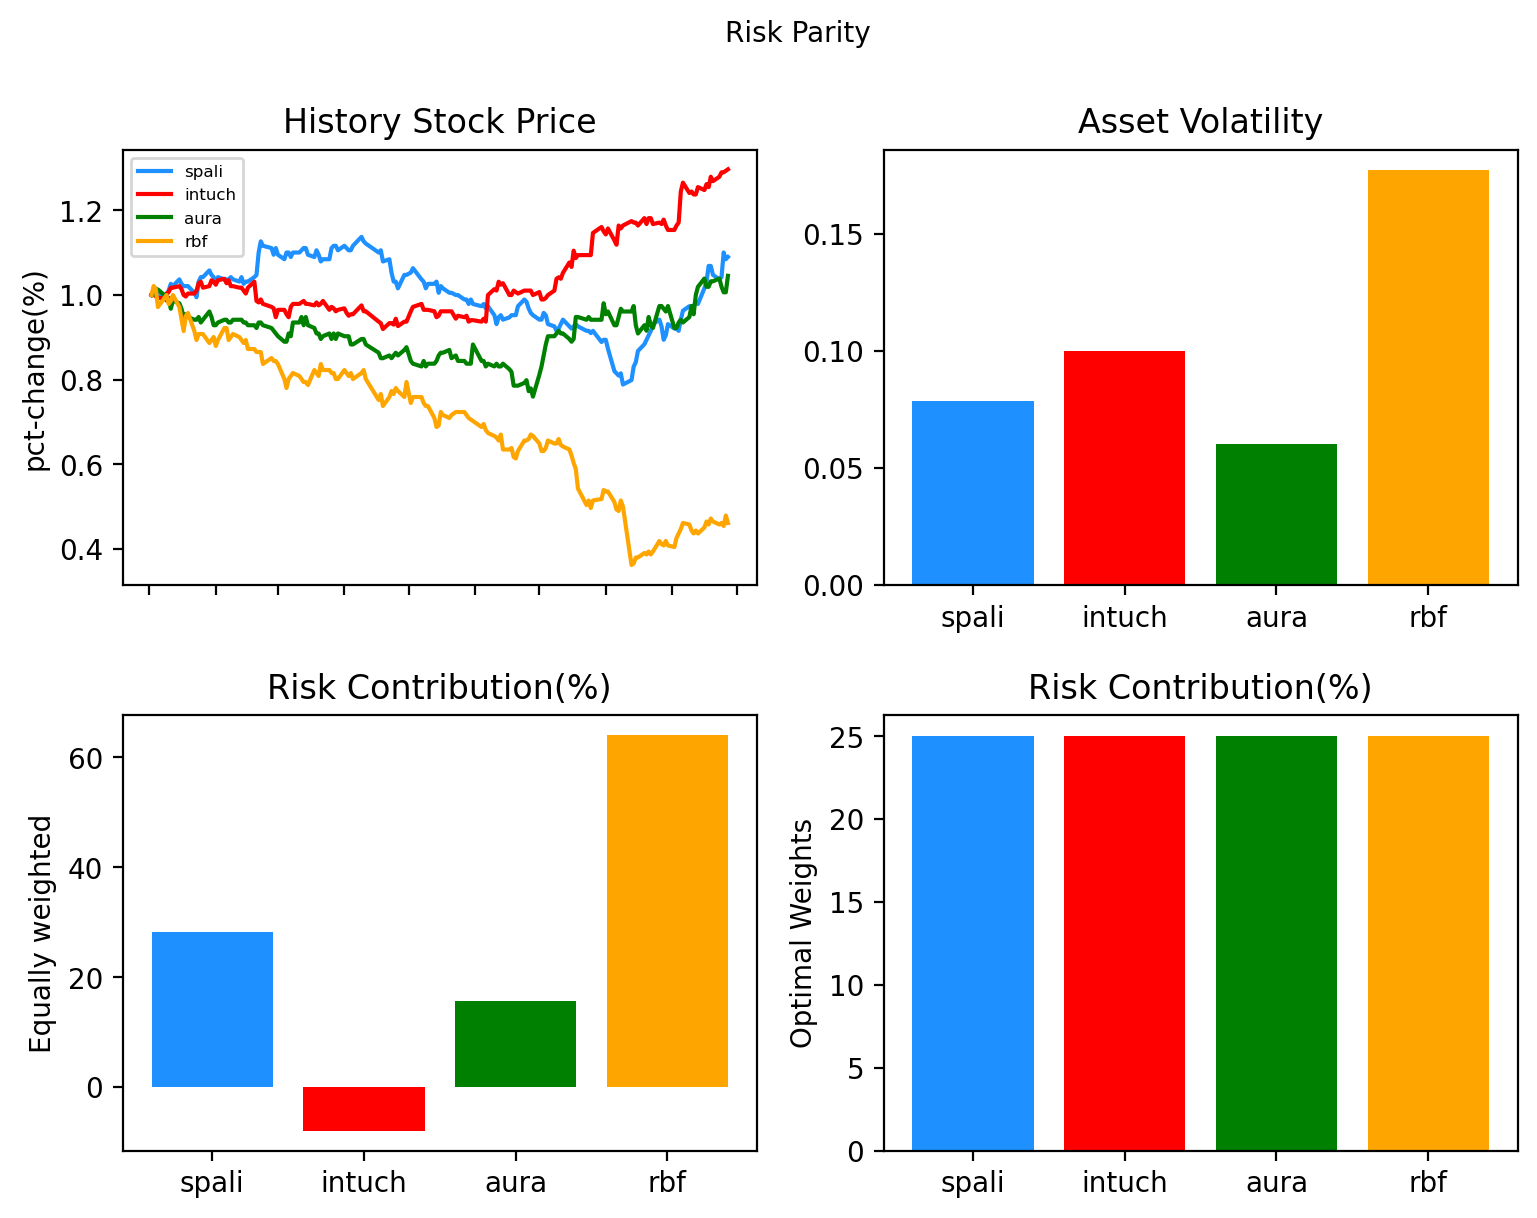

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# สร้าง figure และ subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 6.5))  # 3 กราฟ, 1 คอลัมน์
c = ['dodgerblue','red','green','orange']
# กราฟที่ 1
axs[0,0].plot(df.index, df[asset1],label=basket[0],c=c[0])  
axs[0,0].plot(df.index, df[asset2],label=basket[1],c=c[1])  
axs[0,0].plot(df.index, df[asset3],label=basket[2],c=c[2])  
axs[0,0].plot(df.index, df[asset4],label=basket[3],c=c[3])   
axs[0,0].set_title('History Stock Price')

axs[0,0].set_ylabel('pct-change(%)')
axs[0,0].set_xticklabels([])
axs[0,0].legend(fontsize=6)


axs[0,1].bar(x=df.std().index,height=df.std(),color=c)
axs[0,1].set_title('Asset Volatility')


# กราฟที่ 3
axs[1,0].bar(x=rc_df['Asset'],height=rc_df['Risk Contribution(%)'],color=c)
axs[1,0].set_title('Risk Contribution(%)')
axs[1,0].set_ylabel('Equally weighted')

# กราฟที่ 4
axs[1,1].bar(x=rc_df['Asset'],height=rc_df['Otpimal Risk Contribution(%)'],color=c)
axs[1,1].set_title('Risk Contribution(%)')
axs[1,1].set_ylabel('Optimal Weights')
#axs[1,1].set_xlabel('Asset Type')


# เว้นระยะห่างระหว่างแถว
plt.subplots_adjust(hspace=0.3)  # เพิ่มระยะห่างระหว่างแถว

# ปรับการแสดงผลเพื่อไม่ให้ภาพทับกัน
# plt.tight_layout()
fig.suptitle('Risk Parity', fontsize=10)
plt.show()

In [176]:
# แสดงผล Risk Contribution
rc_df 

Asset  Weight  Risk Contribution(%)  Optimal Weights  \
0   spali    0.25             28.262657         0.248957   
1  intuch    0.25             -7.962383         0.356797   
2    aura    0.25             15.648155         0.222941   
3     rbf    0.25             64.051571         0.171305   

   Otpimal Risk Contribution(%)  
0                     24.998988  
1                     24.998892  
2                     24.998500  
3                     25.003619

## Portfolio Return
- หาผลตอบแทนการลงทุน

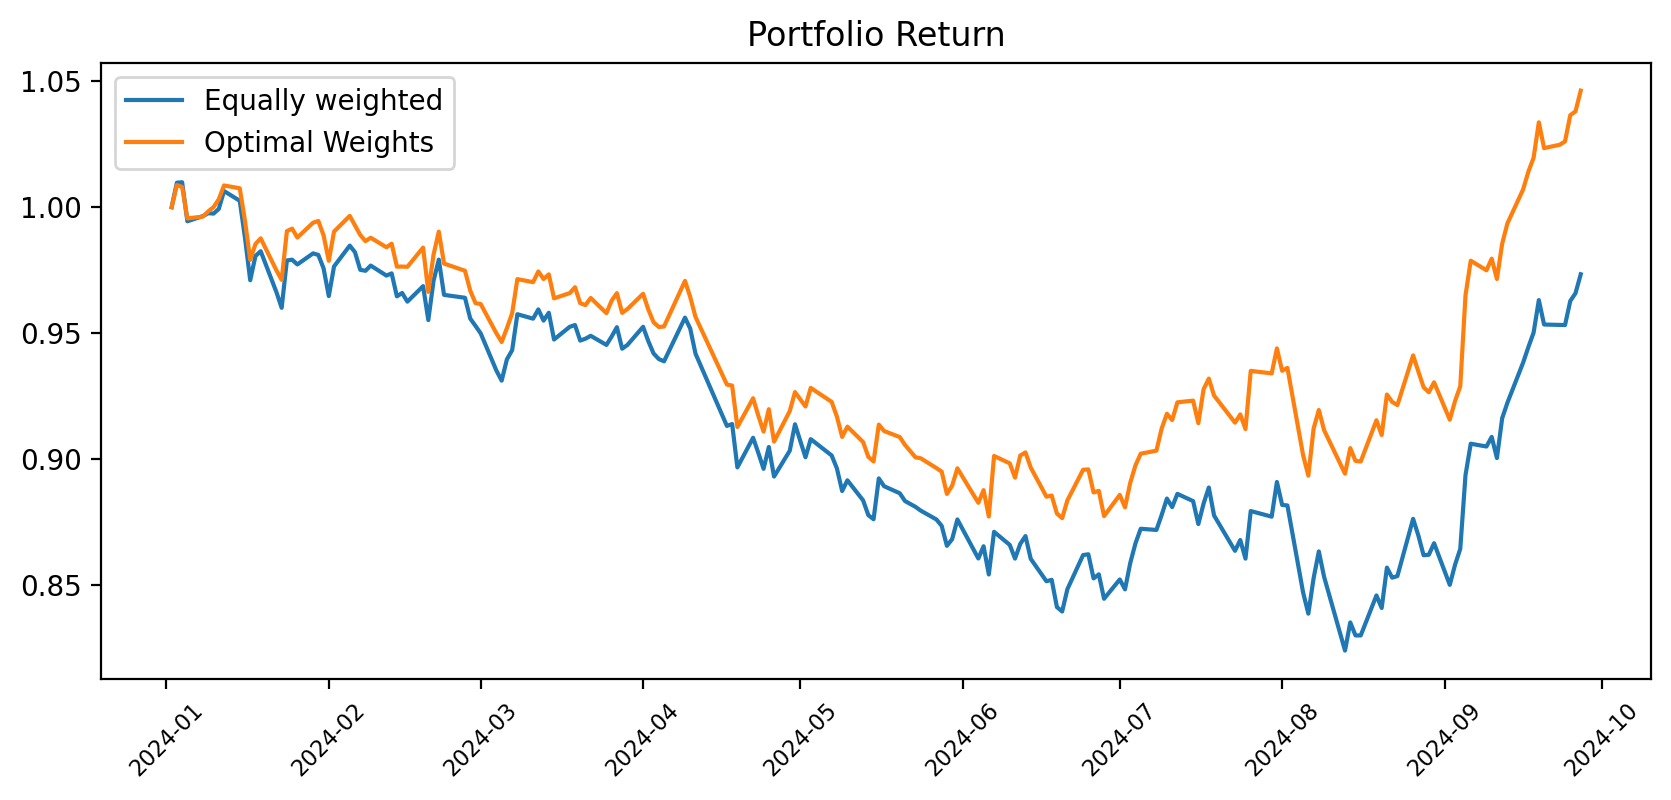

In [178]:
# คำนวณผลตอบแทนพอร์ตในแต่ละวัน
init_weights = np.ones(4)/4
portfolio_returns = np.dot(df, weights)
plt.subplots(figsize=(10,4))
plt.plot(df.index,portfolio_returns,label='Equally weighted')

opt_weights = rc_df['Optimal Weights']
portfolio_returns_opt = np.dot(df, opt_weights)

plt.plot(df.index,portfolio_returns_opt,label='Optimal Weights')
plt.xticks(rotation=45,fontsize=8)
plt.title('Portfolio Return')
plt.legend()
plt.show()

<b>สรุป</b><br>
สินทรัพย์หรือหุ้นแต่ละตัวจะมีผลกระทบต่อพอร์ตเราไม่เท่ากัน เช่น บางตัวมีความผันผวนสูง ขึ้นลงแรง ในขณะที่บางตัวเคลื่อนไหวในกรอบแคบๆ
แล้วเราควรซื้อหุ้นแต่ละตัวเท่าไหร่? เพื่อให้สินทรัพย์หรือหุ้นแต่ละตัวมีผลกระทบหรือมีความเสี่ยงต่อพอร์ตเราเท่าๆ กันทุกตัว 
ช่วยป้องกันไม่ให้สินทรัพย์ตัวใดตัวหนึ่งที่มีความผันผวนสูงเกินไปสร้างความเสียหายอย่างมากกับเรา<br>

Risk Parity จะหาน้ำหนักในการลงทุนเพื่อให้หุ้นแต่ละตัวมีผลกระทบต่อพอร์ตในระดับที่เท่าๆ กัน<br>

<b>ตัวอย่าง</b> สมมติพอร์ตเราถือหุ้น 4 ตัว คือ SPALI, INTUCH, AURA และ RBF โดยให้น้ำหนักเท่าๆ กัน แบ่งเงินลงทุนในแต่ละหุ้นที่ 25% ซึ่งทดสอบเริ่มลงทุนตั้งแต่ต้นปี
พบว่า RBF มีความผันผวนสูง และมี Risk Contribution ถึง 64% (RBF มีส่วนสร้างความเสี่ยงที่กระทบพอร์ตเราที่ 64%) นั่นหมายความว่าฟอร์มของ RBF จะมีผลต่อพอร์ตในสัดส่วนที่สูง แม้ว่าเราจะถือหุ้นเพียง 25% ก็ตาม
<br>

🎯เราจึงทำการคำนวณ Risk Parity เพื่อหาค่า Optimal Weights หรือหาน้ำหนักที่เหมาะสมในการจัดพอร์ตหุ้นทั้ง 4 ตัวนี้ เพื่อให้หุ้นแต่ละตัวมีผลกระทบกับพอร์ตเท่าๆ กัน
สังเกตเมื่อเราปรับน้ำหนักการลงทุนใหม่ (เส้นสีส้ม) ผลตอบแทนของพอร์ตดีขึ้นกว่าการใช้น้ำหนักที่เท่ากันทุกตัว
<br>

อย่างไรก็ตาม จุดอ่อนของ Risk Parity คือมุ่งเน้นการปรับความเสี่ยงให้เท่าเทียมกัน ซึ่งทำให้สินทรัพย์ที่มีความผันผวนน้อย (เช่น พันธบัตร) มีสัดส่วนมากขึ้นในพอร์ต ขณะที่สินทรัพย์ที่มีความเสี่ยงสูงกว่า (เช่น หุ้น) จะได้รับน้ำหนักน้อยลง ซึ่งอาจทำให้พอร์ตสูญเสียโอกาสในการสร้างผลตอบแทนสูงเมื่อสินทรัพย์ที่มีความผันผวนสูงทำผลงานได้ดี